In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [3]:
from datetime import datetime

In [4]:
from pybea.client import BureauEconomicAnalysisClient
bea_key = "3CEFA011-1C00-4C2C-8DC0-93554C0A7639"
bea_client = BureauEconomicAnalysisClient(api_key=bea_key)

In [5]:
def bea_get_data(arg_table,arg_start,arg_end,arg_freq):
    res = bea_client.national_income_and_product_accounts_detail(
        table_name=arg_table,
        frequency=[arg_freq],
        year=[str(i) for i in range(int(arg_start),int(arg_end)+1)])

    data = res['BEAAPI']['Results']['Data']
    data = pd.DataFrame(data)
    data.loc[:,'LineNumber']=[str(i).zfill(3) for i in data['LineNumber'].tolist()]
    data.loc[:,'DataValue']=[str(s).replace(',','') for s in data.loc[:,'DataValue'].tolist()]
    data.loc[:,'DataValue']=data.loc[:,'DataValue'].astype('float64')
    
    data = pd.pivot_table(data,index=['LineNumber','SeriesCode','LineDescription'],
                          columns='TimePeriod',values='DataValue')

    return data

In [6]:
y_start = 2007
y_end =2025

In [7]:
prices = bea_get_data("U20404",y_start,y_end,"M")

https://apps.bea.gov/api/data/?userid=3CEFA011-1C00-4C2C-8DC0-93554C0A7639&method=GetData&datasetname=NIUnderlyingDetail&year=2007%2C2008%2C2009%2C2010%2C2011%2C2012%2C2013%2C2014%2C2015%2C2016%2C2017%2C2018%2C2019%2C2020%2C2021%2C2022%2C2023%2C2024%2C2025&resultformat=JSON&frequency=M&tablename=U20404


In [8]:
pricesX = prices.loc[['153','172','190','209','234','252','280','374','375','376'],:]
pricesX

,,TimePeriod,2007M01,2007M02,2007M03,2007M04,2007M05,2007M06,2007M07,2007M08,2007M09,2007M10,2007M11,2007M12,2008M01,2008M02,2008M03,2008M04,2008M05,2008M06,2008M07,2008M08,2008M09,2008M10,2008M11,2008M12,2009M01,2009M02,2009M03,2009M04,2009M05,2009M06,2009M07,2009M08,2009M09,2009M10,2009M11,2009M12,2010M01,2010M02,2010M03,2010M04,2010M05,2010M06,2010M07,2010M08,2010M09,2010M10,2010M11,2010M12,2011M01,2011M02,2011M03,2011M04,2011M05,2011M06,2011M07,2011M08,2011M09,2011M10,2011M11,2011M12,2012M01,2012M02,2012M03,2012M04,2012M05,2012M06,2012M07,2012M08,2012M09,2012M10,2012M11,2012M12,2013M01,2013M02,2013M03,2013M04,2013M05,2013M06,2013M07,2013M08,2013M09,2013M10,2013M11,2013M12,2014M01,2014M02,2014M03,2014M04,2014M05,2014M06,2014M07,2014M08,2014M09,2014M10,2014M11,2014M12,2015M01,2015M02,2015M03,2015M04,2015M05,2015M06,2015M07,2015M08,2015M09,2015M10,2015M11,2015M12,2016M01,2016M02,2016M03,2016M04,2016M05,2016M06,2016M07,2016M08,2016M09,2016M10,2016M11,2016M12,2017M01,2017M02,2017M03,2017M04,2017M05,2017M06,2017M07,2017M08,2017M09,2017M10,2017M11,2017M12,2018M01,2018M02,2018M03,2018M04,2018M05,2018M06,2018M07,2018M08,2018M09,2018M10,2018M11,2018M12,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09,2020M10,2020M11,2020M12,2021M01,2021M02,2021M03,2021M04,2021M05,2021M06,2021M07,2021M08,2021M09,2021M10,2021M11,2021M12,2022M01,2022M02,2022M03,2022M04,2022M05,2022M06,2022M07,2022M08,2022M09,2022M10,2022M11,2022M12,2023M01,2023M02,2023M03,2023M04,2023M05,2023M06,2023M07,2023M08,2023M09,2023M10,2023M11,2023M12,2024M01,2024M02,2024M03,2024M04,2024M05,2024M06,2024M07,2024M08,2024M09,2024M10,2024M11,2024M12,2025M01,2025M02,2025M03,2025M04,2025M05
LineNumber,SeriesCode,LineDescription,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
153,DHSGRG,Housing,78.678,78.922,79.129,79.273,79.384,79.545,79.713,79.92,80.142,80.359,80.625,80.849,81.016,81.158,81.321,81.503,81.604,81.811,81.965,82.114,82.31,82.452,82.665,82.737,82.917,83.028,83.2,83.325,83.457,83.479,83.468,83.519,83.437,83.404,83.313,83.299,83.258,83.245,83.207,83.209,83.256,83.315,83.354,83.355,83.412,83.454,83.567,83.664,83.78,83.906,83.997,84.081,84.187,84.321,84.503,84.696,84.819,85.0,85.137,85.304,85.462,85.593,85.771,85.965,86.085,86.184,86.332,86.506,86.7,86.893,87.037,87.179,87.333,87.515,87.672,87.846,88.028,88.207,88.336,88.573,88.736,88.922,89.137,89.388,89.584,89.776,90.012,90.229,90.433,90.63,90.856,91.05,91.263,91.472,91.713,91.89,92.136,92.402,92.655,92.91,93.131,93.438,93.707,93.932,94.202,94.425,94.631,94.86,95.128,95.379,95.611,95.891,96.213,96.507,96.782,97.049,97.392,97.7,98.023,98.313,98.564,98.831,99.052,99.268,99.509,99.797,100.059,100.401,100.67,100.984,101.257,101.607,101.893,102.086,102.392,102.717,102.979,103.22,103.527,103.835,104.06,104.353,104.692,104.941,105.209,105.525,105.87,106.236,106.506,106.846,107.123,107.392,107.706,107.91,108.194,108.468,108.814,109.076,109.359,109.58,109.847,109.947,110.18,110.342,110.426,110.635,110.69,110.837,110.995,111.254,111.504,111.765,112.097,112.431,112.754,113.094,113.537,114.027,114.513,114.954,115.486,116.044,116.588,117.189,117.905,118.742,119.535,120.416,121.323,122.103,122.923,123.846,124.671,125.541,126.164,126.881,127.548,128.144,128.771,129.33,129.962,130.516,131.137,131.683,132.36,132.946,133.519,134.06,134.624,134.989,135.517,136.148,136.583,137.109,137.453,137.878,138.32,138.708,139.244,139.734,140.098
172,DHLCRG,Health care,83.232,83.505,83.633,83.745,83.861,84.061,84.198,84.411,84.671,85.181,85.229,85.604,85.666,85.84,85.971,86.163,86.301,86.42,86.67,86.812,86.883,87.132,87.308,87.476,87.856,88.016,88.187,88.315,88.58,88.756,88.875,89.215,89.231,89.765,89.974,90.136,90.311,90.486,90.685,90.871,90.932,91.142,91.213,91.382,

In [9]:
quantities = bea_get_data("U20403",y_start,y_end,"M")

https://apps.bea.gov/api/data/?userid=3CEFA011-1C00-4C2C-8DC0-93554C0A7639&method=GetData&datasetname=NIUnderlyingDetail&year=2007%2C2008%2C2009%2C2010%2C2011%2C2012%2C2013%2C2014%2C2015%2C2016%2C2017%2C2018%2C2019%2C2020%2C2021%2C2022%2C2023%2C2024%2C2025&resultformat=JSON&frequency=M&tablename=U20403


In [10]:
quantitiesX = quantities.loc[['153','172','190','209','234','252','280','374','375','376'],:]
quantitiesX

,,TimePeriod,2007M01,2007M02,2007M03,2007M04,2007M05,2007M06,2007M07,2007M08,2007M09,2007M10,2007M11,2007M12,2008M01,2008M02,2008M03,2008M04,2008M05,2008M06,2008M07,2008M08,2008M09,2008M10,2008M11,2008M12,2009M01,2009M02,2009M03,2009M04,2009M05,2009M06,2009M07,2009M08,2009M09,2009M10,2009M11,2009M12,2010M01,2010M02,2010M03,2010M04,2010M05,2010M06,2010M07,2010M08,2010M09,2010M10,2010M11,2010M12,2011M01,2011M02,2011M03,2011M04,2011M05,2011M06,2011M07,2011M08,2011M09,2011M10,2011M11,2011M12,2012M01,2012M02,2012M03,2012M04,2012M05,2012M06,2012M07,2012M08,2012M09,2012M10,2012M11,2012M12,2013M01,2013M02,2013M03,2013M04,2013M05,2013M06,2013M07,2013M08,2013M09,2013M10,2013M11,2013M12,2014M01,2014M02,2014M03,2014M04,2014M05,2014M06,2014M07,2014M08,2014M09,2014M10,2014M11,2014M12,2015M01,2015M02,2015M03,2015M04,2015M05,2015M06,2015M07,2015M08,2015M09,2015M10,2015M11,2015M12,2016M01,2016M02,2016M03,2016M04,2016M05,2016M06,2016M07,2016M08,2016M09,2016M10,2016M11,2016M12,2017M01,2017M02,2017M03,2017M04,2017M05,2017M06,2017M07,2017M08,2017M09,2017M10,2017M11,2017M12,2018M01,2018M02,2018M03,2018M04,2018M05,2018M06,2018M07,2018M08,2018M09,2018M10,2018M11,2018M12,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09,2020M10,2020M11,2020M12,2021M01,2021M02,2021M03,2021M04,2021M05,2021M06,2021M07,2021M08,2021M09,2021M10,2021M11,2021M12,2022M01,2022M02,2022M03,2022M04,2022M05,2022M06,2022M07,2022M08,2022M09,2022M10,2022M11,2022M12,2023M01,2023M02,2023M03,2023M04,2023M05,2023M06,2023M07,2023M08,2023M09,2023M10,2023M11,2023M12,2024M01,2024M02,2024M03,2024M04,2024M05,2024M06,2024M07,2024M08,2024M09,2024M10,2024M11,2024M12,2025M01,2025M02,2025M03,2025M04,2025M05
LineNumber,SeriesCode,LineDescription,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
153,DHSGRA,Housing,90.658,90.789,90.948,91.128,91.334,91.566,91.83,92.12,92.429,92.769,93.136,93.527,93.959,94.336,94.659,94.933,95.165,95.353,95.499,95.599,95.659,95.669,95.634,95.55,95.413,95.306,95.229,95.182,95.163,95.176,95.284,95.426,95.592,95.794,96.033,96.299,96.597,96.876,97.138,97.389,97.622,97.852,97.974,98.082,98.176,98.253,98.311,98.353,98.378,98.408,98.434,98.457,98.479,98.503,98.502,98.5,98.497,98.491,98.487,98.483,98.475,98.475,98.482,98.502,98.524,98.555,98.603,98.66,98.722,98.796,98.874,98.959,99.118,99.256,99.373,99.465,99.532,99.58,99.644,99.685,99.705,99.702,99.68,99.629,99.559,99.498,99.444,99.395,99.357,99.322,99.268,99.228,99.201,99.176,99.156,99.149,99.149,99.149,99.15,99.171,99.198,99.227,99.269,99.317,99.375,99.434,99.501,99.574,99.656,99.724,99.776,99.817,99.846,99.869,99.913,99.943,99.959,99.966,99.97,99.952,99.918,99.9,99.899,99.903,99.927,99.967,99.978,99.998,100.033,100.087,100.154,100.234,100.328,100.421,100.506,100.595,100.682,100.763,100.836,100.913,100.983,101.046,101.108,101.161,101.292,101.433,101.582,101.74,101.902,102.068,102.244,102.432,102.618,102.822,103.033,103.253,103.482,103.71,103.936,104.147,104.384,104.628,104.886,105.143,105.413,105.686,105.95,106.224,106.502,106.774,107.057,107.342,107.621,107.899,108.179,108.459,108.729,109.012,109.298,109.581,109.861,110.125,110.368,110.594,110.803,110.991,111.162,111.311,111.438,111.543,111.635,111.697,111.74,111.791,111.846,111.902,111.965,112.033,112.095,112.167,112.247,112.332,112.422,112.526,112.63,112.739,112.841,112.966,113.087,113.217,113.346,113.484,113.614,113.744,113.869,113.991,114.12,114.239,114.359,114.474,114.587
172,DHLCRA,Health care,77.264,77.292,77.49,77.592,77.749,77.933,78.208,78.534,78.756,78.704,78.811,79.077,79.487,79.694,79.847,79.824,79.915,79.96,80.042,80.136,80.324,80.26,80.355,80.546,80.722,80.986,81.186,81.595,81.854,82.131,82.363,82.297,82.43,82.112,81.978,81.816,81.797,81.815,81.987,82.206,82.58,82.989,83.56,8

In [11]:
reals = bea_get_data("U20406",y_start,y_end,"M")

https://apps.bea.gov/api/data/?userid=3CEFA011-1C00-4C2C-8DC0-93554C0A7639&method=GetData&datasetname=NIUnderlyingDetail&year=2007%2C2008%2C2009%2C2010%2C2011%2C2012%2C2013%2C2014%2C2015%2C2016%2C2017%2C2018%2C2019%2C2020%2C2021%2C2022%2C2023%2C2024%2C2025&resultformat=JSON&frequency=M&tablename=U20406


<Axes: title={'center': '個人消費支出'}>

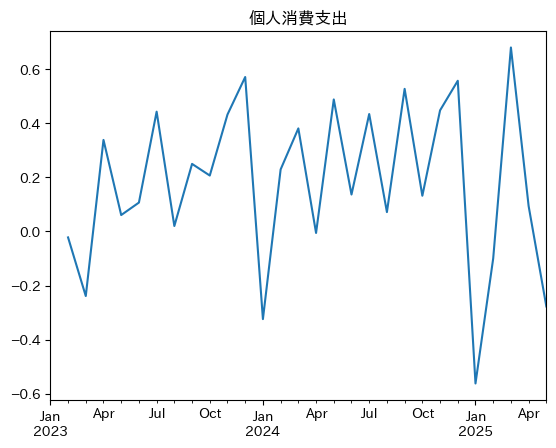

In [12]:
x = reals.loc['001','2023':].T
idx_arch = list(x.index)
x.index = pd.period_range(start=idx_arch[0].replace('M','-'),
                          end=idx_arch[-1].replace('M','-'),freq='M')
((x.diff()/x.shift(1))*100).plot(title='個人消費支出',legend=False)

<Axes: >

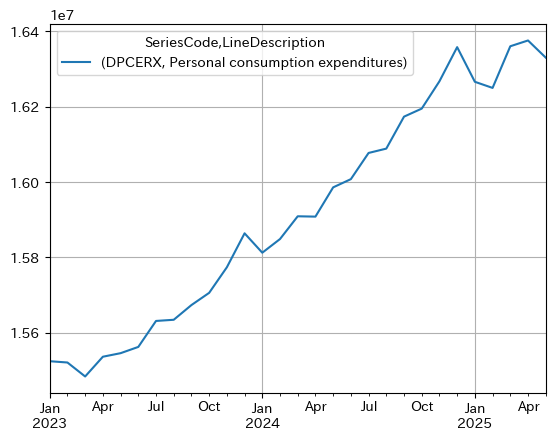

In [13]:
x['2022':].plot(grid=True)

In [14]:
#g_ann(x,3).loc['2019':,:].plot(grid=True)

In [15]:
realsX = reals.loc[['153','172','190','209','234','252','280','374','375','376'],:]
realsX

,,TimePeriod,2007M01,2007M02,2007M03,2007M04,2007M05,2007M06,2007M07,2007M08,2007M09,2007M10,2007M11,2007M12,2008M01,2008M02,2008M03,2008M04,2008M05,2008M06,2008M07,2008M08,2008M09,2008M10,2008M11,2008M12,2009M01,2009M02,2009M03,2009M04,2009M05,2009M06,2009M07,2009M08,2009M09,2009M10,2009M11,2009M12,2010M01,2010M02,2010M03,2010M04,2010M05,2010M06,2010M07,2010M08,2010M09,2010M10,2010M11,2010M12,2011M01,2011M02,2011M03,2011M04,2011M05,2011M06,2011M07,2011M08,2011M09,2011M10,2011M11,2011M12,2012M01,2012M02,2012M03,2012M04,2012M05,2012M06,2012M07,2012M08,2012M09,2012M10,2012M11,2012M12,2013M01,2013M02,2013M03,2013M04,2013M05,2013M06,2013M07,2013M08,2013M09,2013M10,2013M11,2013M12,2014M01,2014M02,2014M03,2014M04,2014M05,2014M06,2014M07,2014M08,2014M09,2014M10,2014M11,2014M12,2015M01,2015M02,2015M03,2015M04,2015M05,2015M06,2015M07,2015M08,2015M09,2015M10,2015M11,2015M12,2016M01,2016M02,2016M03,2016M04,2016M05,2016M06,2016M07,2016M08,2016M09,2016M10,2016M11,2016M12,2017M01,2017M02,2017M03,2017M04,2017M05,2017M06,2017M07,2017M08,2017M09,2017M10,2017M11,2017M12,2018M01,2018M02,2018M03,2018M04,2018M05,2018M06,2018M07,2018M08,2018M09,2018M10,2018M11,2018M12,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09,2020M10,2020M11,2020M12,2021M01,2021M02,2021M03,2021M04,2021M05,2021M06,2021M07,2021M08,2021M09,2021M10,2021M11,2021M12,2022M01,2022M02,2022M03,2022M04,2022M05,2022M06,2022M07,2022M08,2022M09,2022M10,2022M11,2022M12,2023M01,2023M02,2023M03,2023M04,2023M05,2023M06,2023M07,2023M08,2023M09,2023M10,2023M11,2023M12,2024M01,2024M02,2024M03,2024M04,2024M05,2024M06,2024M07,2024M08,2024M09,2024M10,2024M11,2024M12,2025M01,2025M02,2025M03,2025M04,2025M05
LineNumber,SeriesCode,LineDescription,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
153,DHSGRX,Housing,1834241.0,1836900.0,1840117.0,1843744.0,1847921.0,1852605.0,1857956.0,1863824.0,1870080.0,1876948.0,1884377.0,1892279.0,1901020.0,1908655.0,1915199.0,1920734.0,1925430.0,1929223.0,1932190.0,1934204.0,1935417.0,1935617.0,1934923.0,1933223.0,1930454.0,1928279.0,1926727.0,1925768.0,1925395.0,1925644.0,1927837.0,1930703.0,1934072.0,1938147.0,1943000.0,1948365.0,1954393.0,1960044.0,1965343.0,1970423.0,1975146.0,1979794.0,1982264.0,1984449.0,1986351.0,1987901.0,1989076.0,1989924.0,1990440.0,1991047.0,1991577.0,1992027.0,1992480.0,1992957.0,1992944.0,1992905.0,1992848.0,1992731.0,1992638.0,1992552.0,1992396.0,1992400.0,1992543.0,1992935.0,1993387.0,1994014.0,1994996.0,1996143.0,1997389.0,1998885.0,2000468.0,2002188.0,2005411.0,2008198.0,2010559.0,2012422.0,2013784.0,2014747.0,2016058.0,2016887.0,2017281.0,2017228.0,2016779.0,2015755.0,2014321.0,2013091.0,2012006.0,2011009.0,2010249.0,2009527.0,2008439.0,2007634.0,2007085.0,2006576.0,2006174.0,2006028.0,2006038.0,2006041.0,2006058.0,2006475.0,2007019.0,2007617.0,2008469.0,2009426.0,2010601.0,2011804.0,2013148.0,2014638.0,2016293.0,2017665.0,2018715.0,2019557.0,2020138.0,2020598.0,2021484.0,2022093.0,2022430.0,2022557.0,2022644.0,2022273.0,2021599.0,2021237.0,2021212.0,2021299.0,2021777.0,2022593.0,2022816.0,2023222.0,2023931.0,2025010.0,2026366.0,2027984.0,2029884.0,2031780.0,2033484.0,2035289.0,2037047.0,2038684.0,2040177.0,2041717.0,2043152.0,2044420.0,2045676.0,2046743.0,2049384.0,2052241.0,2055270.0,2058463.0,2061726.0,2065102.0,2068647.0,2072465.0,2076228.0,2080354.0,2084615.0,2089080.0,2093712.0,2098313.0,2102882.0,2107151.0,2111947.0,2116900.0,2122117.0,2127318.0,2132782.0,2138291.0,2143634.0,2149191.0,2154816.0,2160314.0,2166040.0,2171795.0,2177439.0,2183078.0,2188744.0,2194395.0,2199872.0,2205591.0,2211385.0,2217112.0,2222774.0,2228112.0,2233033.0,2237605.0,2241829.0,2245627.0,2249094.0,2252096.0,2254670.0,2256799.0,2258661.0,2259911.0,2260779.0,2261820.0,2

In [16]:
nominals = bea_get_data("U20405",y_start,y_end,"M")

https://apps.bea.gov/api/data/?userid=3CEFA011-1C00-4C2C-8DC0-93554C0A7639&method=GetData&datasetname=NIUnderlyingDetail&year=2007%2C2008%2C2009%2C2010%2C2011%2C2012%2C2013%2C2014%2C2015%2C2016%2C2017%2C2018%2C2019%2C2020%2C2021%2C2022%2C2023%2C2024%2C2025&resultformat=JSON&frequency=M&tablename=U20405


In [17]:
nominalsX = nominals.loc[['153','172','190','209','234','252','280','374','375','376'],:]
nominalsX

,,TimePeriod,2007M01,2007M02,2007M03,2007M04,2007M05,2007M06,2007M07,2007M08,2007M09,2007M10,2007M11,2007M12,2008M01,2008M02,2008M03,2008M04,2008M05,2008M06,2008M07,2008M08,2008M09,2008M10,2008M11,2008M12,2009M01,2009M02,2009M03,2009M04,2009M05,2009M06,2009M07,2009M08,2009M09,2009M10,2009M11,2009M12,2010M01,2010M02,2010M03,2010M04,2010M05,2010M06,2010M07,2010M08,2010M09,2010M10,2010M11,2010M12,2011M01,2011M02,2011M03,2011M04,2011M05,2011M06,2011M07,2011M08,2011M09,2011M10,2011M11,2011M12,2012M01,2012M02,2012M03,2012M04,2012M05,2012M06,2012M07,2012M08,2012M09,2012M10,2012M11,2012M12,2013M01,2013M02,2013M03,2013M04,2013M05,2013M06,2013M07,2013M08,2013M09,2013M10,2013M11,2013M12,2014M01,2014M02,2014M03,2014M04,2014M05,2014M06,2014M07,2014M08,2014M09,2014M10,2014M11,2014M12,2015M01,2015M02,2015M03,2015M04,2015M05,2015M06,2015M07,2015M08,2015M09,2015M10,2015M11,2015M12,2016M01,2016M02,2016M03,2016M04,2016M05,2016M06,2016M07,2016M08,2016M09,2016M10,2016M11,2016M12,2017M01,2017M02,2017M03,2017M04,2017M05,2017M06,2017M07,2017M08,2017M09,2017M10,2017M11,2017M12,2018M01,2018M02,2018M03,2018M04,2018M05,2018M06,2018M07,2018M08,2018M09,2018M10,2018M11,2018M12,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09,2020M10,2020M11,2020M12,2021M01,2021M02,2021M03,2021M04,2021M05,2021M06,2021M07,2021M08,2021M09,2021M10,2021M11,2021M12,2022M01,2022M02,2022M03,2022M04,2022M05,2022M06,2022M07,2022M08,2022M09,2022M10,2022M11,2022M12,2023M01,2023M02,2023M03,2023M04,2023M05,2023M06,2023M07,2023M08,2023M09,2023M10,2023M11,2023M12,2024M01,2024M02,2024M03,2024M04,2024M05,2024M06,2024M07,2024M08,2024M09,2024M10,2024M11,2024M12,2025M01,2025M02,2025M03,2025M04,2025M05
LineNumber,SeriesCode,LineDescription,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
153,DHSGRC,Housing,1443032.0,1449610.0,1455945.0,1461463.0,1466837.0,1473530.0,1480904.0,1489448.0,1498602.0,1508170.0,1519167.0,1529782.0,1540033.0,1548937.0,1557387.0,1565388.0,1571169.0,1578262.0,1583672.0,1588213.0,1592997.0,1595930.0,1599481.0,1599466.0,1600657.0,1601005.0,1603039.0,1604637.0,1606879.0,1607515.0,1609121.0,1612503.0,1613737.0,1616497.0,1618770.0,1622969.0,1627194.0,1631631.0,1635302.0,1639551.0,1644418.0,1649451.0,1652281.0,1654126.0,1656837.0,1658961.0,1662206.0,1664844.0,1667579.0,1670598.0,1672856.0,1674905.0,1677414.0,1680485.0,1684100.0,1687911.0,1690311.0,1693810.0,1696468.0,1699729.0,1702739.0,1705356.0,1709015.0,1713216.0,1715991.0,1718502.0,1722298.0,1726769.0,1731721.0,1736870.0,1741126.0,1745467.0,1751362.0,1757438.0,1762674.0,1767802.0,1772664.0,1777131.0,1780884.0,1786388.0,1790043.0,1793749.0,1797688.0,1801843.0,1804524.0,1807286.0,1811063.0,1814530.0,1817954.0,1821251.0,1824823.0,1827979.0,1831739.0,1835474.0,1839946.0,1843342.0,1848287.0,1853613.0,1858707.0,1864194.0,1869141.0,1875851.0,1882052.0,1887464.0,1893985.0,1899619.0,1905023.0,1911052.0,1918039.0,1924398.0,1930083.0,1936548.0,1943611.0,1949990.0,1956411.0,1962410.0,1969671.0,1976023.0,1982637.0,1988140.0,1992554.0,1997590.0,2002046.0,2006479.0,2011843.0,2018470.0,2024001.0,2031325.0,2037466.0,2044902.0,2051818.0,2060550.0,2068269.0,2074129.0,2082088.0,2090543.0,2097694.0,2104277.0,2112072.0,2119954.0,2126035.0,2133345.0,2141589.0,2147807.0,2156035.0,2165507.0,2175795.0,2186710.0,2195738.0,2206353.0,2215865.0,2225519.0,2236082.0,2244780.0,2255302.0,2265855.0,2278141.0,2288660.0,2299602.0,2308926.0,2319807.0,2327376.0,2338059.0,2347233.0,2355032.0,2365583.0,2372665.0,2381953.0,2391583.0,2403262.0,2415028.0,2427098.0,2440627.0,2454220.0,2467636.0,2481469.0,2497383.0,2514682.0,2532014.0,2548343.0,2566672.0,2585261.0,2603122.0,2621881.0,2642888.0,2666164.0,2688132.0,2711580.0,2735133.0,2755327.0,2776146.0,2798587.0,2818339.0,2839339.0,2

In [18]:
def make_index(arg_df):
    arg_start = list(arg_df.index)[0].replace('M','-')
    arg_end = list(arg_df.index)[-1].replace('M','-')
    return pd.period_range(start=arg_start,end=arg_end,freq='M')

In [19]:
def edit_df(arg_df):
    arg_df = arg_df.T
    arg_df.columns = [s[1] for s in list(arg_df.columns)]
    arg_df.index = make_index(arg_df)

    return arg_df.astype('float')

In [20]:
pricesX = edit_df(pricesX)
quantitiesX = edit_df(quantitiesX)
nominalsX = edit_df(nominalsX)
realsX = edit_df(realsX)

In [21]:
def make_super_core(arg_indx,arg_w,arg_label):
    items = ['DHLCR','DTRSR','DRCAR','DFSAR','DIFSR','DOTSR']
    a_col = [s for s in list(arg_indx.columns) if s[:-1] in items]
    b_col = [s for s in list(arg_w.columns) if s[:-1] in items]
    a = np.log(arg_indx.loc[:,a_col]).diff()
    b = arg_w.loc[:,b_col].shift(1)
    b.columns = list(a.columns)

    a = pd.DataFrame((a*b).sum(axis=1) / b.sum(axis=1),columns=[arg_label])
    a.iloc[0]=100
    for i in range(1,a.shape[0]):
        a.iloc[i]=a.iloc[i-1]*np.exp(a.iloc[i])
        
    return a

In [22]:
pricesX.tail()

,DHSGRG,DHLCRG,DTRSRG,DRCARG,DFSARG,DIFSRG,DOTSRG,DPCCRG,IA000062,IA000063
2025-01,138.320,118.903,136.019,128.997,136.323,138.323,119.036,124.407,108.444,130.205
2025-02,138.708,119.338,135.738,130.269,136.815,140.548,119.674,124.999,108.890,130.851
2025-03,139.244,119.630,134.935,130.732,136.594,140.926,120.254,125.118,108.599,131.130
2025-04,139.734,119.929,135.541,129.790,137.071,139.789,120.234,125.288,108.896,131.248
2025-05,140.098,120.066,135.428,129.449,137.418,139.531,120.762,125.512,109.155,131.457


In [23]:
super_core_p = make_super_core(pricesX,realsX,'super core p')
super_core_q = make_super_core(quantitiesX,nominalsX,'super core q')

<Axes: >

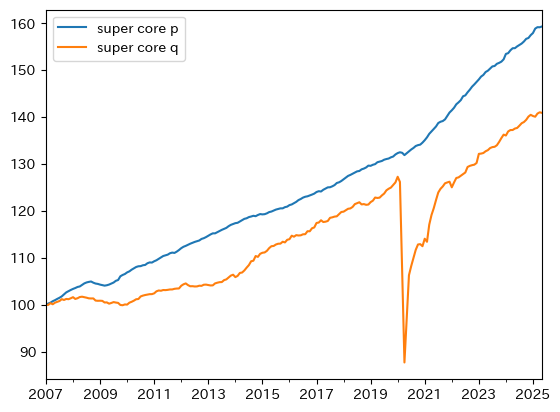

In [24]:
pd.concat([super_core_p,super_core_q],axis=1).plot()

In [25]:
def g_ann(arg_df,nn):
    return ((arg_df/arg_df.shift(nn))**int(12/nn)-1)*100

In [26]:
p3 = pd.concat([pricesX.loc[:,['DPCCRG','IA000062','DHSGRG']],super_core_p],axis=1)
p3.columns = ['core PCED','core goods p','housing p','super core p']

         core PCED  core goods p  housing p  super core p
2025-04   2.862870      1.677673   4.152199      3.148010
2025-05   1.651747      0.977019   4.069077      1.141924


<Axes: >

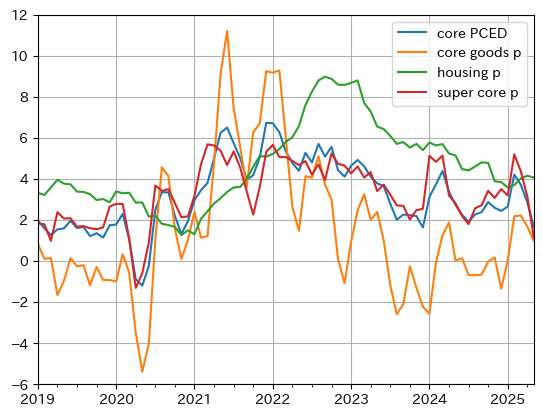

In [41]:
N = 3
print(g_ann(p3,N).iloc[-2:,:])
g_ann(p3,N).loc['2019':,:].plot(grid=True,ylim=(-6,12))

core PCED       2.924499
core goods p    1.577676
housing p       3.885617
super core p    3.148413
Name: 2025-05, dtype: float64


<Axes: >

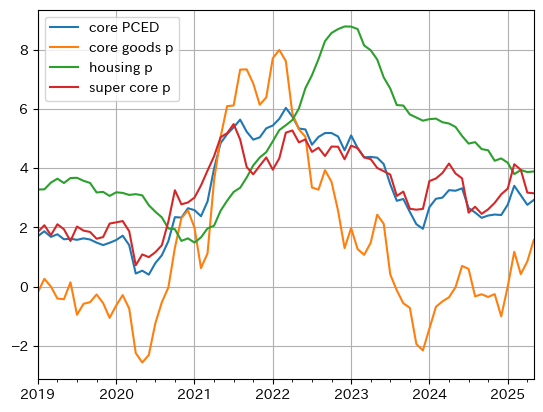

In [28]:
N = 6
print(g_ann(p3,N).iloc[-1,:])
g_ann(p3,N).loc['2019':,:].plot(grid=True)

### レンジ描画

In [29]:
from fredapi import Fred
fred = Fred(api_key="efedf207a63071188c699caf884a4ee9")

data_list = ['CPILFESL','MEDCPIM158SFRBCLE','TRMMEANCPIM158SFRBCLE']

for i in range(len(data_list)):
    s = data_list[i]
    if i == 0:
        data = fred.get_series(s)
    else:
        data = pd.concat([data,fred.get_series(s)],axis=1)
        print(s)
data = data.dropna(how='any',axis=0)
data['median']=100
data['trimmed']=100
data.columns = [0,1,2,'median','trimmed']

i=1
for i in range(1,data.shape[0]):
    
    data.iloc[i,-2]=data.iloc[i-1,-2]*(1+data.iloc[i,1]/100)**(1/12)
    data.iloc[i,-1]=data.iloc[i-1,-1]*(1+data.iloc[i,2]/100)**(1/12)
data = data.drop([1,2],axis=1)
data.columns = ['core','median','trimmed']
last_date2 = datetime.strftime(list(data.index)[-1],'%Y-%m')
data.index = pd.period_range(start='1983-01',end=last_date2,freq='M')
data

MEDCPIM158SFRBCLE
TRMMEANCPIM158SFRBCLE


,core,median,trimmed
1983-01,97.600,100.000000,100.000000
1983-02,98.000,100.403630,100.326700
1983-03,98.200,100.700975,100.582232
1983-04,98.600,101.097435,100.985466
1983-05,98.900,101.409472,101.317002
...,...,...,...
2025-01,324.739,356.060341,324.221018
2025-02,325.475,357.087221,325.104361
2025-03,325.659,358.309040,325.792374
2025-04,326.430,359.476565,326.604145


             core    median   trimmed
2024-01  3.851040  5.147070  3.904573
2024-02  4.137299  4.735872  4.241474
2024-03  4.587288  4.917253  4.309092
2024-04  4.143154  4.427526  3.610037
2024-05  3.204283  3.926370  2.767620
2024-06  2.011448  3.182132  2.336633
2024-07  1.694563  2.646533  2.009221
2024-08  2.265157  2.943358  2.316732
2024-09  3.168173  3.492888  2.759106
2024-10  3.500300  3.848753  3.108252
2024-11  3.522342  3.689728  3.405988
2024-12  3.103728  3.386190  3.229220
2025-01  3.848052  3.463066  3.802713
2025-02  3.588318  3.559918  3.826295
2025-03  2.955847  3.876480  3.654589
2025-04  2.099229  3.893390  2.972703
2025-05  1.705555  3.617960  2.605274


<Axes: >

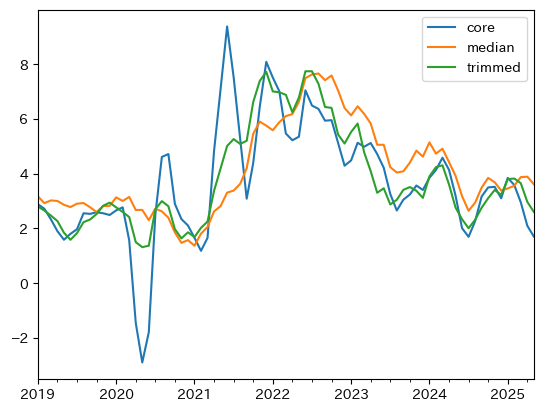

In [30]:
N = 3
print(g_ann(data,N).loc['2024':,:])
g_ann(data,N).loc['2019':,:].plot()

#### core PCED

In [31]:
core = pd.DataFrame(p3['core PCED'])
core

,core PCED
2007-01,85.224
2007-02,85.408
2007-03,85.494
2007-04,85.616
2007-05,85.717
...,...
2025-01,124.407
2025-02,124.999
2025-03,125.118
2025-04,125.288


In [32]:
g_ann(core,1).loc['2022':,:]

,core PCED
2022-01,5.857812
2022-02,5.536283
2022-03,4.617940
2022-04,4.169144
2022-05,4.407853
2022-06,7.270614
2022-07,2.783726
2022-08,7.131720
2022-09,5.406270
2022-10,4.170754


#### median PCED

In [33]:

med = pd.read_csv('https://www.clevelandfed.org/-/media/files/webcharts/medianpce/median-pce-full-history.csv?sc_lang=en')
med = med.iloc[:,:2]
med.columns = ['date','median PCED']
med = med.set_index('date')
med.index = [datetime.strptime(s,'%m/%d/%Y') for s in list(med.index)]

med.iloc[0]=100
for i in range(1,med.shape[0]):
    med.iloc[i]=med.iloc[i-1]*(1+med.iloc[i]/100)

last_date2 = datetime.strftime(list(med.index)[-1],'%Y-%m')
med.index = pd.period_range(start='1977-01',end=last_date2,freq='M')
med

,median PCED
1977-01,100.000000
1977-02,100.661221
1977-03,101.244064
1977-04,101.710859
1977-05,102.212535
...,...
2025-01,506.736638
2025-02,508.154001
2025-03,509.491606
2025-04,511.076193


#### trimmed-mean PCED

In [34]:

trimmed = pd.read_excel('https://www.dallasfed.org/~/media/documents/research/pce/pcehist',
                        header=3)
date = pd.to_datetime(trimmed.iloc[:,0].to_list())
trimmed = pd.DataFrame(trimmed.loc[:,'1-month'])
trimmed.index = date

trimmed.iloc[0]=100
for i in range(1,trimmed.shape[0]):
    trimmed.iloc[i]=trimmed.iloc[i-1]*(1+trimmed.iloc[i]/100)**(1/12)
trimmed.columns=['trimmed_mean PCED']

last_date2 = datetime.strftime(list(trimmed.index)[-1],'%Y-%m')
trimmed.index = pd.period_range(start='1977-01',end=last_date2,freq='M')
trimmed

,trimmed_mean PCED
1977-01,100
1977-02,100.566198
1977-03,101.09139
1977-04,101.483088
1977-05,101.957801
...,...
2025-01,417.857699
2025-02,418.898415
2025-03,419.822656
2025-04,420.738691


In [35]:
pced = pd.concat([core,med,trimmed],axis=1,join='inner')#
pced

,core PCED,median PCED,trimmed_mean PCED
2007-01,85.224,321.772863,284.194043
2007-02,85.408,322.664446,284.980086
2007-03,85.494,323.350266,285.476394
2007-04,85.616,323.866523,285.938535
2007-05,85.717,324.319010,286.378006
...,...,...,...
2025-01,124.407,506.736638,417.857699
2025-02,124.999,508.154001,418.898415
2025-03,125.118,509.491606,419.822656
2025-04,125.288,511.076193,420.738691


In [36]:
g_ann(data,3).mean(axis=1).loc['2022':]

2022-01    6.705570
2022-02    6.625441
2022-03    6.154310
2022-04    5.884988
2022-05    6.256320
2022-06    7.430303
2022-07    7.289609
2022-08    7.106529
2022-09    6.600303
2022-10    6.652189
2022-11    5.873036
2022-12    5.267510
2023-01    5.382512
2023-02    5.810830
2023-03    5.318848
2023-04    5.018971
2023-05    4.361205
2023-06    4.248680
2023-07    3.460494
2023-08    3.248888
2023-09    3.516895
2023-10    3.719989
2023-11    3.930867
2023-12    3.718456
2024-01    4.300895
2024-02    4.371548
2024-03    4.604545
2024-04    4.060239
2024-05    3.299425
2024-06    2.510071
2024-07    2.116772
2024-08    2.508416
2024-09    3.140056
2024-10    3.485769
2024-11    3.539353
2024-12    3.239712
2025-01    3.704610
2025-02    3.658177
2025-03    3.495639
2025-04    2.988441
2025-05    2.642930
Freq: M, dtype: float64

In [37]:
g_ann(data,3).min(axis=1).loc['2022':]

2022-01    5.590075
2022-02    5.883647
2022-03    5.470218
2022-04    5.224902
2022-05    5.353747
2022-06    7.049998
2022-07    6.495201
2022-08    6.369164
2022-09    5.939974
2022-10    5.958997
2022-11    5.131951
2022-12    4.294360
2023-01    4.488058
2023-02    5.131935
2023-03    4.781051
2023-04    4.095598
2023-05    3.305564
2023-06    3.469275
2023-07    2.877302
2023-08    2.656555
2023-09    3.050928
2023-10    3.241692
2023-11    3.377951
2023-12    3.118790
2024-01    3.851040
2024-02    4.137299
2024-03    4.309092
2024-04    3.610037
2024-05    2.767620
2024-06    2.011448
2024-07    1.694563
2024-08    2.265157
2024-09    2.759106
2024-10    3.108252
2024-11    3.405988
2024-12    3.103728
2025-01    3.463066
2025-02    3.559918
2025-03    2.955847
2025-04    2.099229
2025-05    1.705555
Freq: M, dtype: float64

In [38]:
g_ann(pced,3).min(axis=1).loc['2022':]

2022-01    5.218565
2022-02     5.44693
2022-03    4.951914
2022-04     3.87085
2022-05    4.052085
2022-06    5.273164
2022-07    4.804379
2022-08    5.707971
2022-09    5.062043
2022-10     5.16573
2022-11    4.312414
2022-12    4.110054
2023-01    4.643271
2023-02    4.923919
2023-03    4.615443
2023-04     4.10859
2023-05    3.782481
2023-06    3.340904
2023-07    2.795118
2023-08    2.013976
2023-09    2.264093
2023-10    2.240507
2023-11    2.194026
2023-12    1.636068
2024-01    3.124134
2024-02    3.599978
2024-03    3.994167
2024-04    3.049708
2024-05    2.725702
2024-06    2.254738
2024-07    1.919676
2024-08    2.053325
2024-09    2.186424
2024-10    2.628651
2024-11     2.59554
2024-12    2.443486
2025-01    2.653949
2025-02    3.026667
2025-03    2.913201
2025-04    2.786522
2025-05    1.651747
Freq: M, dtype: object

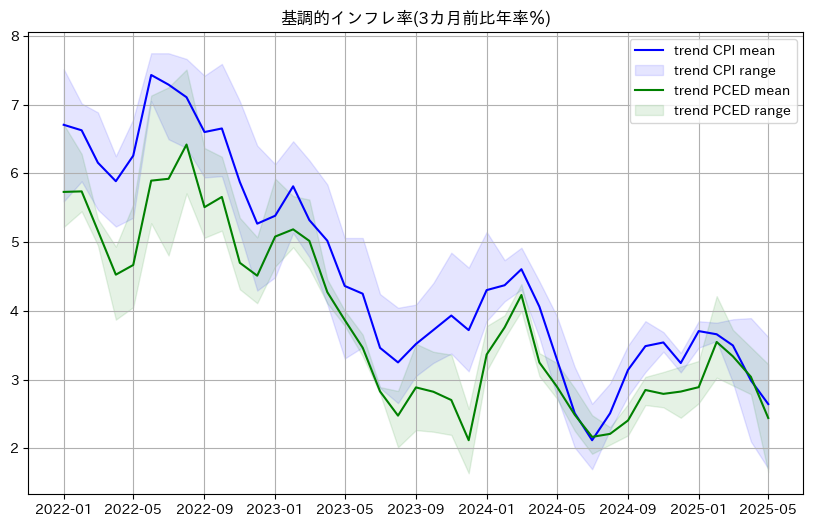

In [39]:
# プロットの作成
plt.figure(figsize=(10, 6))

# データ1のプロットと網掛け
mean1 = g_ann(data,3).mean(axis=1).loc['2022':].astype('float')
max1 = g_ann(data,3).max(axis=1).loc['2022':].astype('float')
min1 = g_ann(data,3).min(axis=1).loc['2022':].astype('float')
x1 = mean1.index.to_timestamp()

plt.plot(x1, mean1, label='trend CPI mean', color='blue')
plt.fill_between(x1, min1, max1, color='blue', alpha=0.1, label='trend CPI range')

# データ2のプロットと網掛け
mean2 = g_ann(pced,3).mean(axis=1).loc['2022':].astype('float')
max2 = g_ann(pced,3).max(axis=1).loc['2022':].astype('float')
min2 = g_ann(pced,3).min(axis=1).loc['2022':].astype('float')
x2 = mean2.index.to_timestamp()

plt.plot(x2, mean2, label='trend PCED mean', color='green')
plt.fill_between(x2, min2, max2, color='green', alpha=0.1, label='trend PCED range')

# 凡例の追加
plt.legend()
plt.grid()

# タイトルと軸ラベルの設定
plt.title('基調的インフレ率(3カ月前比年率％)')
#plt.xlabel('Date')
#plt.ylabel('Value')

# グラフの表示
plt.show()

### ここまで

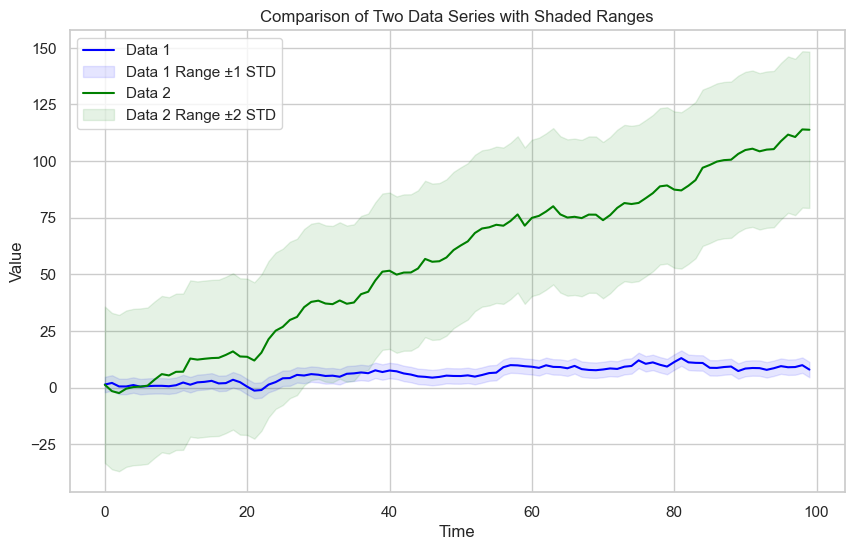

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# データの生成
np.random.seed(10)
data1 = np.random.normal(loc=0, scale=1, size=100).cumsum()
data2 = np.random.normal(loc=1, scale=2, size=100).cumsum()
x = np.arange(len(data1))

# Seabornのスタイルを設定
sns.set(style="whitegrid")

# プロットの作成
plt.figure(figsize=(10, 6))

# データ1のプロットと網掛け
mean1 = data1.mean()
std1 = data1.std()
plt.plot(x, data1, label='Data 1', color='blue')
plt.fill_between(x, data1 - std1, data1 + std1, color='blue', alpha=0.1, label='Data 1 Range ±1 STD')

# データ2のプロットと網掛け
mean2 = data2.mean()
std2 = data2.std()
plt.plot(x, data2, label='Data 2', color='green')
plt.fill_between(x, data2 - std2, data2 + std2, color='green', alpha=0.1, label='Data 2 Range ±2 STD')

# 凡例の追加
plt.legend()

# タイトルと軸ラベルの設定
plt.title('Comparison of Two Data Series with Shaded Ranges')
plt.xlabel('Time')
plt.ylabel('Value')

# グラフの表示
plt.show()


In [41]:
data.mean(axis=1)

1983-01     99.200000
1983-02     99.576777
1983-03     99.827736
1983-04    100.227634
1983-05    100.542158
              ...    
2024-12    333.698771
2025-01    335.006786
2025-02    335.888861
2025-03    336.586805
2025-04    337.503570
Freq: M, Length: 508, dtype: float64